# Importing spatial data

In [3]:
print("Hello world")

Hello world


## Import packages

In [43]:
import sys
print(sys.version)

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

import os
import pandas as pd

import PIL 
import torchvision.transforms
# import osgeo
import rasterio

3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:40:50) [MSC v.1937 64 bit (AMD64)]


In [5]:
# globals()
# locals()
# %whos
# dir() # list all the variables in the current scope
print(1 + 5)

6


Specify the file path to the raster images

In [6]:
# Path to your TIF file
file_path = '../buffalo2005_ndvi_cent.tif'

Read in the raster images and save as a stack

In [7]:
# Using rasterio 
with rasterio.open(file_path) as ndvi:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    ndvi_stack = ndvi.read([i for i in range(1, ndvi.count + 1)])

ndvi_stack[1]

array([[0.4628507 , 0.46933344, 0.4856459 , ..., 0.3077629 , 0.27147323,
        0.26670995],
       [0.4747636 , 0.45477185, 0.41591862, ..., 0.28807092, 0.29366472,
        0.2959113 ],
       [0.41848227, 0.44886476, 0.40914774, ..., 0.29358125, 0.2874979 ,
        0.30564857],
       ...,
       [0.21124065, 0.21103786, 0.24381681, ..., 0.34552917, 0.3619392 ,
        0.3726061 ],
       [0.21662495, 0.2165933 , 0.2282968 , ..., 0.3750619 , 0.37037298,
        0.3766373 ],
       [0.2052631 , 0.2138619 , 0.20415023, ..., 0.37280592, 0.3576123 ,
        0.36352497]], dtype=float32)

How many layers are present?

In [8]:
## Using rasterio functions
# Number of layers in the stack (rasterio object)
ndvi.count

15

Plot the layers

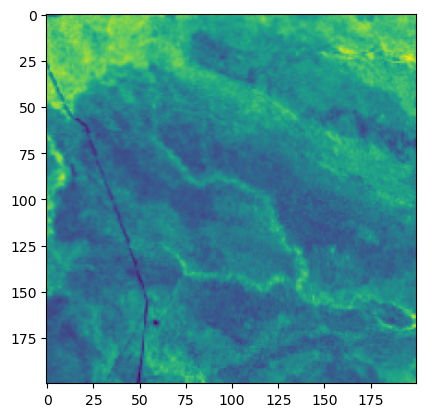

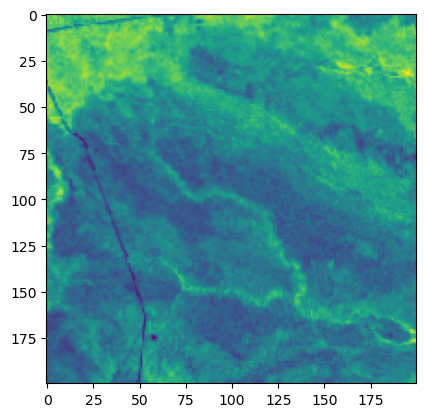

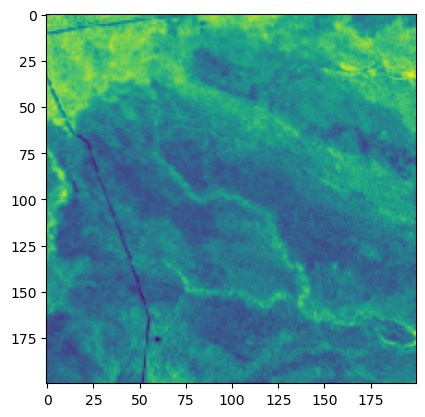

In [9]:
# for i in range(0, ndvi.count):
for i in range(0, 3):
    plt.imshow(ndvi_stack[i])
    plt.show()

In [10]:
# list the .tif files in the folder
for root, dirs, files in os.walk('../'):
    for file in files:
        if file.endswith('.tif'):
            print(file)

buffalo2005_canopy_cover_cent1000.tif
buffalo2005_ndvi_cent.tif
buffalo2005_ndvi_cent1000.tif
buffalo2005_pres1000.tif
buffalo2005_slope_cent1000.tif
buffalo2005_veg_herby_cent1000.tif
buffalo2005_ndvi_cent.tif
CLR_TS_2pDailyMemALL_naive_unnorm_hourly_2024-02-29.tif
CLR_TS_2pDailyMemALL_naive_unnorm_hourly_2024-03-04.tif
canopy_cover.tif
ndvi_GEE_projected_watermask20230207.tif
slope_raster.tif
veg_herby.tif


## NDVI

In [11]:
# Path to your TIF file
file_path = '../buffalo2005_ndvi_cent1000.tif'

# Using rasterio 
with rasterio.open(file_path) as ndvi:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    ndvi_stack = ndvi.read([i for i in range(1, ndvi.count + 1)])

# ndvi_stack
# ndvi_stack.shape
# ndvi_stack.dtype
# ndvi_stack.size

ndvi_tens = torch.from_numpy(ndvi_stack)
ndvi_tens.shape
torch.mean(ndvi_tens)

tensor(0.2729)

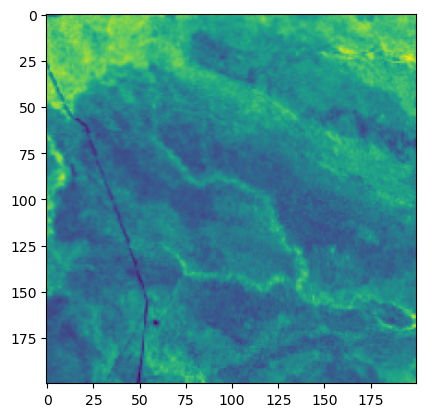

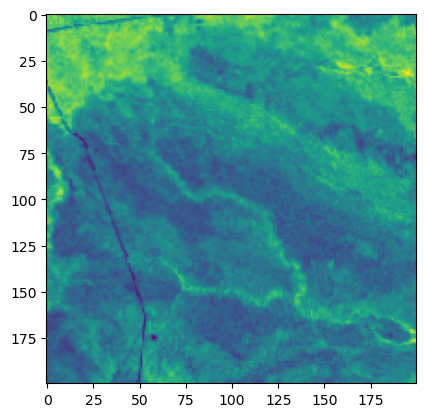

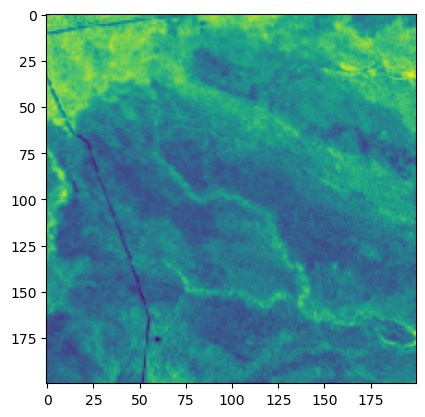

In [12]:
for i in range(0, 3):
    plt.imshow(ndvi_stack[i])
    plt.show()

## Canopy cover

In [13]:
# Path to your TIF file
file_path = '../buffalo2005_canopy_cover_cent1000.tif'

# Using rasterio 
with rasterio.open(file_path) as canopy:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    canopy_stack = canopy.read([i for i in range(1, canopy.count + 1)])

# canopy_stack

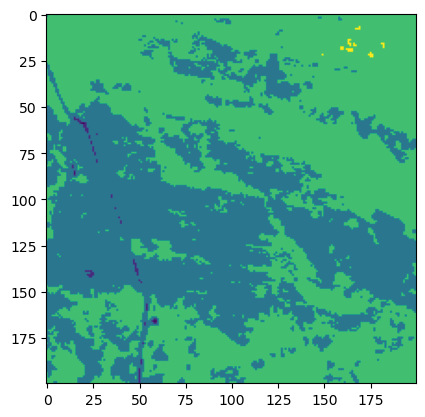

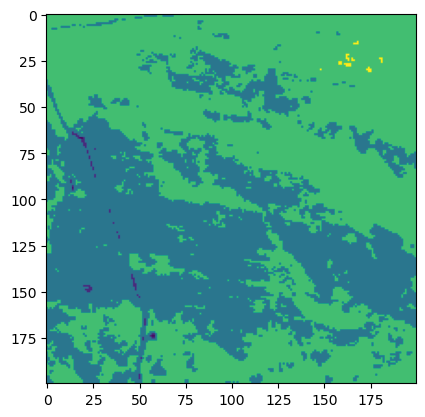

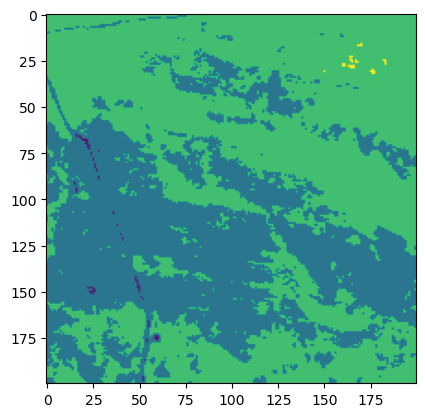

In [14]:
for i in range(0, 3):
    plt.imshow(canopy_stack[i])
    plt.show()

## Herbaceous vegetation

In [15]:
# Path to your TIF file
file_path = '../buffalo2005_veg_herby_cent1000.tif'

# Using rasterio 
with rasterio.open(file_path) as herby:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    herby_stack = herby.read([i for i in range(1, herby.count + 1)])

# herby_stack

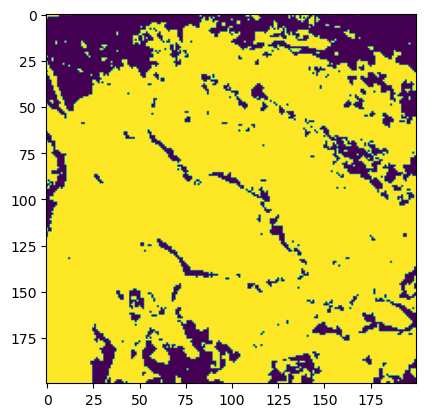

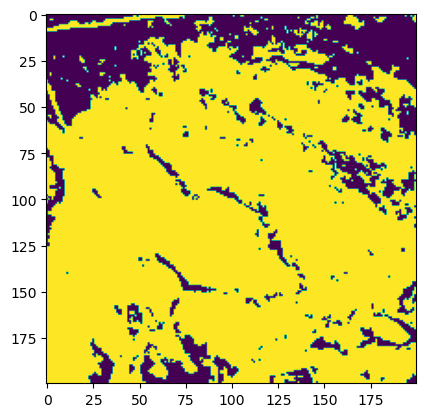

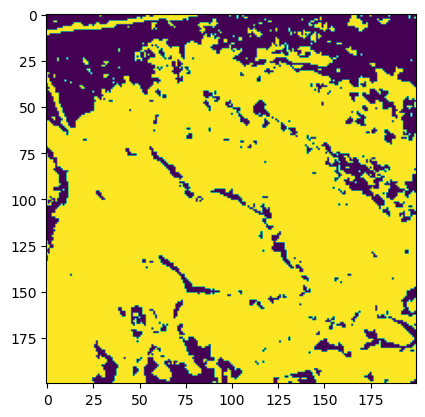

In [16]:
for i in range(0, 3):
    plt.imshow(herby_stack[i])
    plt.show()

## Slope

In [17]:
# Path to your TIF file
file_path = '../buffalo2005_slope_cent1000.tif'

# Using rasterio 
with rasterio.open(file_path) as slope:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    slope_stack = slope.read([i for i in range(1, slope.count + 1)])

# slope_stack

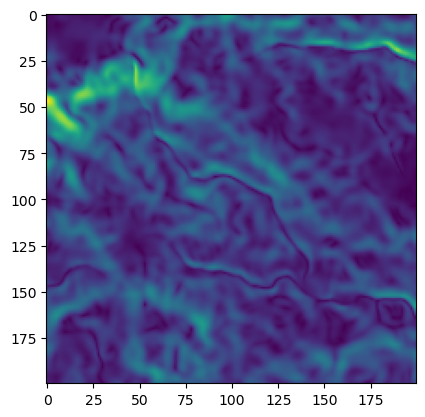

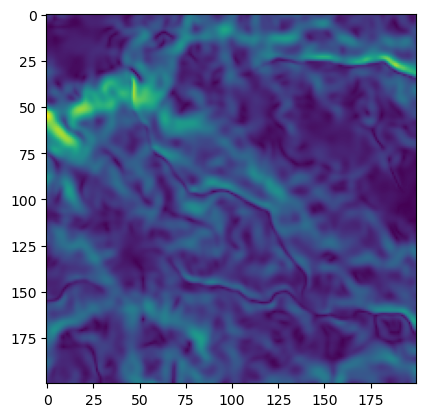

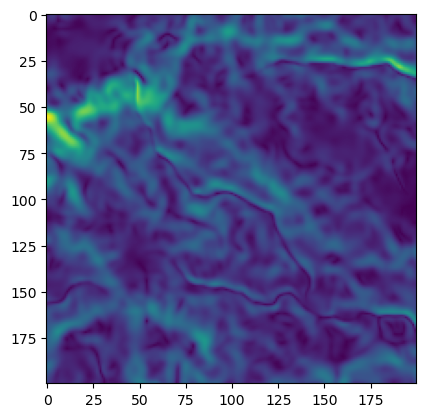

In [18]:
for i in range(0, 3):
    plt.imshow(slope_stack[i])
    plt.show()

## Presence records - target of model

In [19]:
# Path to your TIF file
file_path = '../buffalo2005_pres1000.tif'

# Using rasterio 
with rasterio.open(file_path) as pres:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    pres_stack = pres.read([i for i in range(1, pres.count + 1)])

# pres_stack


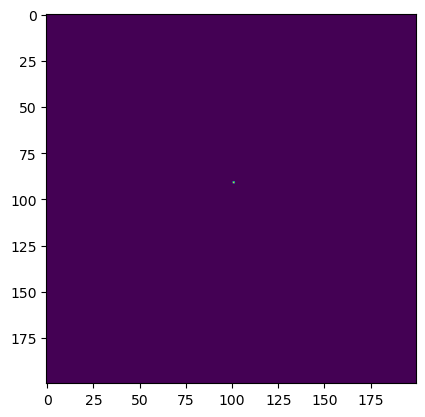

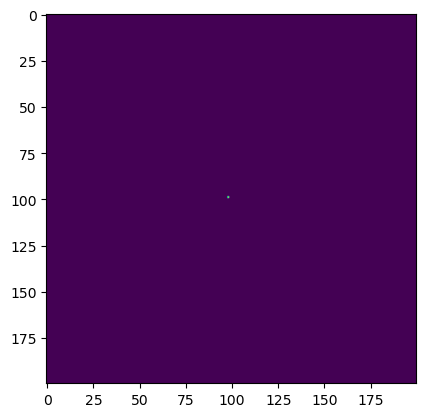

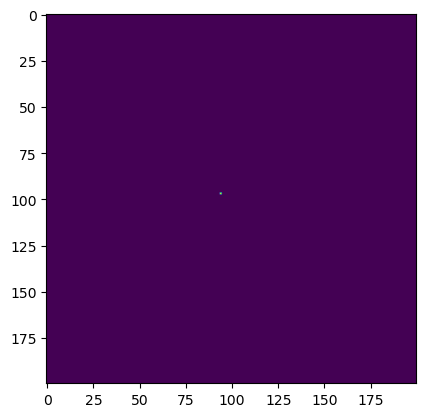

In [20]:
for i in range(0, 3):
    plt.imshow(pres_stack[i])
    plt.show()

Find the index of the occupied cell

In [23]:
# pres_stack

# Find the coordinates of the 1
coordinates = np.where(pres_stack[0] == 1)
print(coordinates)
x, y = coordinates[0][0], coordinates[1][0]
print(x, y)

# Convert coordinates to single index for CrossEntropyLoss
index = x * 200 + y
print(index)

(array([91], dtype=int64), array([101], dtype=int64))
91 101
18301


Now do for all locations

In [24]:
# Iterate over all the layers in the stack and store the coordinates of the 1
indices = []
for i in range(0, pres.count):
    coordinates = np.where(pres_stack[i] == 1)
    x, y = coordinates[0][0], coordinates[1][0]
    index = x * 200 + y
    indices.append(index)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [27]:
print(indices)
# how many entries in indices
print(len(indices))

[18301, 19898, 19494, 20302, 19692, 20098, 24102, 19899, 20099, 18490, 19265, 19497, 18898, 19899, 19900, 20099, 20895, 22906, 20316, 20100, 20099, 19900, 20717, 23515, 15732, 18093, 18481, 19293, 20292, 22707, 20099, 19900, 20100, 20099, 18693, 16882, 21092, 18699, 20294, 20100, 20099, 19109, 20504, 21914, 19506, 20102, 20492, 19899, 19898, 22508, 19899, 20099, 20097, 23078, 20100, 20099, 20285, 18701, 20710, 20103, 20099, 19900, 20099, 19899, 20100, 19899, 23117, 21913, 15329, 20097, 14265, 22300, 19900, 20100, 20697, 22085, 22710, 19908, 19303, 20100, 20099, 19899, 20092, 19501, 20099, 20099, 22697, 20504, 20502, 19696, 19711, 9489, 20098, 22698, 19900, 20099, 19900, 20100, 17704, 22297, 20097, 20100, 19899, 20099, 19900, 20100, 20099, 21495, 26300, 19906, 20102, 20302, 16128, 16694, 24286, 20100, 20099, 19899, 21481, 20683, 20896, 20698, 19501, 20907, 18300, 15491, 19900, 20099, 20099, 19900, 20099, 18308, 17708, 18713, 20303, 21308, 20700, 18696, 20497, 20686, 20097, 20100, 19900,

In [28]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


# Starting to build up a model

Combing the data into a TensorDataSet

In [31]:
print(indices[0:800])

[18301, 19898, 19494, 20302, 19692, 20098, 24102, 19899, 20099, 18490, 19265, 19497, 18898, 19899, 19900, 20099, 20895, 22906, 20316, 20100, 20099, 19900, 20717, 23515, 15732, 18093, 18481, 19293, 20292, 22707, 20099, 19900, 20100, 20099, 18693, 16882, 21092, 18699, 20294, 20100, 20099, 19109, 20504, 21914, 19506, 20102, 20492, 19899, 19898, 22508, 19899, 20099, 20097, 23078, 20100, 20099, 20285, 18701, 20710, 20103, 20099, 19900, 20099, 19899, 20100, 19899, 23117, 21913, 15329, 20097, 14265, 22300, 19900, 20100, 20697, 22085, 22710, 19908, 19303, 20100, 20099, 19899, 20092, 19501, 20099, 20099, 22697, 20504, 20502, 19696, 19711, 9489, 20098, 22698, 19900, 20099, 19900, 20100, 17704, 22297, 20097, 20100, 19899, 20099, 19900, 20100, 20099, 21495, 26300, 19906, 20102, 20302, 16128, 16694, 24286, 20100, 20099, 19899, 21481, 20683, 20896, 20698, 19501, 20907, 18300, 15491, 19900, 20099, 20099, 19900, 20099, 18308, 17708, 18713, 20303, 21308, 20700, 18696, 20497, 20686, 20097, 20100, 19900,

In [ ]:
# set up some hyperparameters
bs = 8

# when using a spatial layer as the target
# train_ds = TensorDataset(torch.from_numpy(ndvi_stack[0:800]), torch.from_numpy(pres_stack[0:800]))
# print(train_ds)
# print(train_ds.tensors)
# train_dl = DataLoader(train_ds, batch_size=bs, shuffle = True)

# test_ds = TensorDataset(torch.from_numpy(ndvi_stack[800:1000]), torch.from_numpy(pres_stack[800:1000]))
# # print(train_ds)
# # print(train_ds.tensors)
# test_dl = DataLoader(test_ds, batch_size=bs, shuffle = True)

# Convert to a torch tensor (if using as a target for loss calculation)
# target = torch.tensor([indices], dtype=torch.long)

train_ds = TensorDataset(torch.from_numpy(ndvi_stack[0:800]), torch.tensor(indices[0:800], dtype=torch.long))
print(train_ds)
print(train_ds.tensors)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle = True)

test_ds = TensorDataset(torch.from_numpy(ndvi_stack[800:999]), torch.tensor(indices[800:999], dtype=torch.long))
# print(train_ds)
# print(train_ds.tensors)
test_dl = DataLoader(test_ds, batch_size=bs, shuffle = True)


In [36]:
print(train_dl)
print(train_dl.dataset.tensors[0].shape)
print(test_dl.dataset.tensors[0].shape)

print(train_dl.dataset.tensors[1].shape)
print(test_dl.dataset.tensors[1].shape)

torch.Size([800, 200, 200])
torch.Size([199, 200, 200])
torch.Size([800])
torch.Size([199])


Define the model class

In [37]:
class FCNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() # don't flatten before CNNs
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(200*200, 1000),
            nn.ReLU(),
            # nn.Linear(40000, 40000),
            # nn.ReLU(),
            nn.Linear(1000, 200*200),
            # softmax
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        # when using MSE
        # pred_probab = nn.Softmax(dim=1)(logits)
        # return pred_probab
    
        return logits

Take a look at the model's structure

In [38]:
model = FCNeuralNetwork().to(device)
print(model)

FCNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=40000, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=40000, bias=True)
  )
)


In [39]:
X = torch.rand(1, 200, 200, device=device)
# logits = model(X)
pred_probab = model(X)
# pred_probab = nn.Softmax(dim=1)(logits)
# y_pred = pred_probab.argmax(1)
# print(f"Predicted class: {y_pred}")

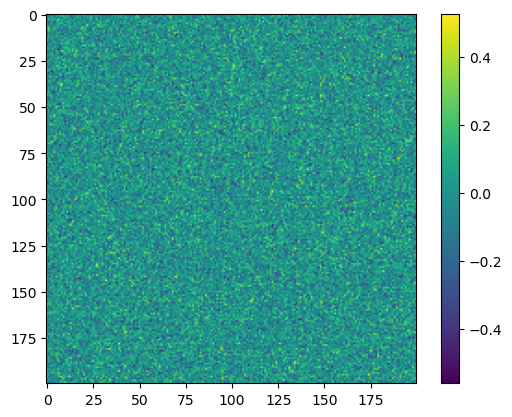

In [41]:
pred_probab

image = pred_probab.view(200, 200).detach().cpu().numpy()
plt.imshow(image)  # 'cmap' can be adjusted based on your data
plt.colorbar()  # Optionally add a colorbar to see the scale
# plt.title('Output Image')
plt.show()

In [42]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([1000, 40000]) | Values : tensor([[ 4.2315e-03, -3.6008e-03,  8.6010e-04,  ...,  6.8792e-05,
         -6.9976e-04, -1.1663e-03],
        [-6.2147e-05,  4.6544e-03, -3.4821e-03,  ...,  2.7033e-03,
         -1.0516e-03, -4.1021e-03]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([1000]) | Values : tensor([-0.0049,  0.0025], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([40000, 1000]) | Values : tensor([[ 0.0130,  0.0120,  0.0173,  ...,  0.0245,  0.0017, -0.0064],
        [ 0.0095,  0.0251, -0.0020,  ..., -0.0117,  0.0058,  0.0112]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([40000]) | Values : tensor([ 0.0173, -0.0282], grad_fn=<SliceBackward0>) 



In [44]:
# Initialize the loss function
# loss_fn = nn.MSELoss()
# loss_fn = nn.L1Loss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [46]:
(b, c) = next(iter(train_dl))
print(b, c)

tensor([[[0.2846, 0.2747, 0.2776,  ..., 0.3330, 0.3383, 0.3410],
         [0.2754, 0.2733, 0.2696,  ..., 0.3338, 0.3427, 0.3543],
         [0.2597, 0.2534, 0.2429,  ..., 0.3092, 0.3293, 0.3514],
         ...,
         [0.2437, 0.2464, 0.2509,  ..., 0.4094, 0.4217, 0.4518],
         [0.2548, 0.2541, 0.2830,  ..., 0.4535, 0.3969, 0.4175],
         [0.3084, 0.2976, 0.3250,  ..., 0.4369, 0.3963, 0.4243]],

        [[0.4181, 0.3968, 0.4138,  ..., 0.4583, 0.4510, 0.4519],
         [0.4279, 0.4413, 0.4775,  ..., 0.4569, 0.4492, 0.4441],
         [0.4299, 0.4455, 0.4622,  ..., 0.4305, 0.4244, 0.4377],
         ...,
         [0.2897, 0.2744, 0.2614,  ..., 0.3549, 0.3578, 0.3470],
         [0.2905, 0.2766, 0.2633,  ..., 0.3495, 0.3648, 0.3640],
         [0.3069, 0.2970, 0.2767,  ..., 0.3450, 0.3759, 0.3810]],

        [[0.3968, 0.4138, 0.4652,  ..., 0.4510, 0.4519, 0.4742],
         [0.4413, 0.4775, 0.4838,  ..., 0.4492, 0.4441, 0.4571],
         [0.4455, 0.4622, 0.4815,  ..., 0.4244, 0.4377, 0.

In [49]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Flatten the target tensor 'y'
        # y_flattened = y.view(y.shape[0], -1)

        # Compute prediction and loss
        # pred = model(X)
        # loss = loss_fn(pred, y_flattened)
        # loss = loss_fn(model(X), y.view(y.shape[0], -1))

        # with cross entropy loss
        loss = loss_fn(model(X), y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>15f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            # pred = model(X)
            # test_loss += loss_fn(model(X), y.view(y.shape[0], -1)).item()
            # correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            # with cross entropy loss
            test_loss += loss_fn(model(X), y)

    test_loss /= num_batches
    # correct /= size
    # print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    print(f"Avg loss: {test_loss:>15f} \n")

In [50]:
# learning_rate = 1e-1
batch_size = 10 # does not actually affect the batch size - this should be changed prior to creating the dataloader object
epochs = 10

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dl, model, loss_fn, optimizer)
    test_loop(test_dl, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss:       10.641907  [    8/  800]
loss:       12.226078  [  108/  800]
loss:        5.346626  [  208/  800]
loss:       10.581176  [  308/  800]
loss:        6.885584  [  408/  800]
loss:        8.650277  [  508/  800]
loss:        8.865891  [  608/  800]
loss:        7.199330  [  708/  800]
loss:        7.652334  [  808/  800]
loss:        6.973074  [  908/  800]
Avg loss:        6.967970 

Epoch 2
-------------------------------
loss:        6.818501  [    8/  800]
loss:        7.772839  [  108/  800]
loss:        3.916279  [  208/  800]
loss:        5.344066  [  308/  800]
loss:        4.532051  [  408/  800]
loss:        5.218098  [  508/  800]
loss:        6.099802  [  608/  800]
loss:        4.083160  [  708/  800]
loss:        3.550600  [  808/  800]
loss:        3.586831  [  908/  800]
Avg loss:        6.967684 

Epoch 3
-------------------------------
loss:        4.819311  [    8/  800]
loss:        5.007571  [  108/  800]
loss:     